In [1]:
#  ФИО студента: Болотов Михаил Александрович
#  Группа:       16 В-1
#  Вариант №1
#  Задание:  Titanic
#  1. Определите количество мужчин и женщин, которые ехали на корабле.
#  2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
#  3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
#  4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
#  5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
#  6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
#  7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
#  8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках.
#  9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 
#  10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

import pandas as pd  #  Импортирование модулей для обработки данных
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Mikhail\\Desktop\\Lab1\\train.csv")  #  Создание объекта и чтение таблицы по ссылке

In [3]:
df.head(7)  #  Вывод 7 строк таблицы

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
print(df['PassengerId'].count())  #  Количество пассажиров

891


In [5]:
#  1. Определите количество мужчин и женщин, которые ехали на корабле.
df.groupby(["Sex"])["PassengerId"].count()  #  Определение количества мужчин и женщин на корабле

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [6]:
#  2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
df.groupby(["Survived"])["PassengerId"].count()  #  Количество выживших пассажиров

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [7]:
df.groupby(["Survived"])["PassengerId"].count().iloc[1]/df['PassengerId'].count()  #  Доля выживших пассажиров

0.3838383838383838

In [8]:
342/891  #  Проверка

0.3838383838383838

In [9]:
#  3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
df.groupby(["Pclass"])["PassengerId"].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [10]:
print("Пассажиров в первом классе: %s" %df.groupby(["Pclass"])["PassengerId"].count().loc[1])  #  Пассажиров в первом классе
passengers = df['PassengerId'].count()  #  Переменной passengers присваиваем количество пассажиров
prop_passengers_first = df.groupby(["Pclass"])["PassengerId"].count().loc[1] / passengers  #  Доля пассажиров в первом классе
print(f"Доля пассажиров в первом классе: {prop_passengers_first}")

Пассажиров в первом классе: 216
Доля пассажиров в первом классе: 0.24242424242424243


In [11]:
#  4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
mean_age = df["Age"].mean()  #  Средний возраст пассажиров
median_age = df["Age"].median()  #  Медиана возраста пассажиров
print(f"Средний возраст пассажиров: {mean_age}\nМедиана возраста пассажиров: {median_age}")

Средний возраст пассажиров: 29.69911764705882
Медиана возраста пассажиров: 28.0


In [12]:
#  5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  #  Функция возвращает коэффициент корреляции Пирсона и p-value
%matplotlib inline

In [13]:
SibSp_ = df["SibSp"]  #  Братьев и сестер на борту
Parch_ = df["Parch"]  #  Родителей и детей на борту
print(SibSp_, Parch_)

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      3
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     4
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     3
25     1
26     0
27     3
28     0
29     0
      ..
861    1
862    0
863    8
864    0
865    0
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64 0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      2
9      0
10     1
11     0
12     0
13     5
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     5
26     0
27     2
28     0
29     0
      ..
861    0
862    0
863    2
864    0
865    0
866    0
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    0
875    

In [14]:
r, p_value = pearsonr(SibSp_, Parch_)  #  Функция возвращает коэффициент корреляции Пирсона и p-value

In [15]:
print("Коэффициент корреляции Пирсона: {0}\nКоэффициент значимости p-value: {1}".format(r, p_value))

Коэффициент корреляции Пирсона: 0.4148376986201561
Коэффициент значимости p-value: 2.2418236681398336e-38


In [16]:
import scipy.stats as sts

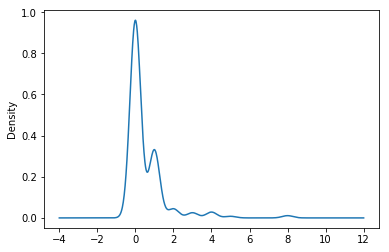

In [17]:
SibSp_.plot.kde()  #  Плотность распределения признаков SibSp

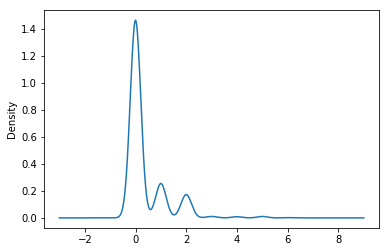

In [18]:
Parch_.plot.kde()  #  Плотность распределения признаков Parch

In [19]:
#  6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
df.groupby(["Name", "Sex"])["PassengerId"].count().head()  #  Посмотрим на закономерность имен

Name                                   Sex   
Abbing, Mr. Anthony                    male      1
Abbott, Mr. Rossmore Edward            male      1
Abbott, Mrs. Stanton (Rosa Hunt)       female    1
Abelson, Mr. Samuel                    male      1
Abelson, Mrs. Samuel (Hannah Wizosky)  female    1
Name: PassengerId, dtype: int64

In [259]:
def getName (name):
    """Returns the name of the passenger"""
    name = name.split('.')[1].strip()  #  Разделяет строку имени по запятым, удаляет пробельные символы и возвращает имя
    return name.split(' ')[0].strip()  #  Отбирает первое имя и удаляет пробелы
names = df["Name"][(df.Sex=="female")].apply(getName)  #  Сортировка столбца Name по признаку fename
#for i in range(len(names)):
#    print(names.nunique())
print(f"Количество уникальных женских имен: {names.nunique()}")  #  nunique() - Выбирает уникальные названия
tmp = dict([('name', names), ('id', range(len(names)))])  #  Создание словаря с женскими именами
names = pd.DataFrame(tmp)  #  По словарю создаем новыу таблицу с женскими именами
names_count = names.groupby(["name"]).count()  #  Группировка по именам
max_name = names_count.max()  #  Неизвестное имя, которое встретилось максимальное количество раз
tmpTableName = names_count[names_count.id == int(max_name)]  #  Таблица с именем, которое встречается максимальное количество раз
isName = list(tmpTableName.index)[0]  #  Имя, которое встречается максимальное количество раз
print (f"Женское имя {isName} встречается максимальное количество раз: {int(max_name)}")  #  Вывод информации

Количество уникальных женских имен: 203
Женское имя William встречается максимальное количество раз: 13


In [21]:
#  7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
df.groupby(["Survived", "Pclass"])["Pclass"].count()  #  Видно, что погибших людей, ехавших классом 3 больше относительно 1 класса

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

In [23]:
Unsurvived_1 = df[(df["Pclass"]==1)&(df["Survived"]==0)]  #  Погибшие 1 класса
Unsurvived_3 = df[(df["Pclass"]==3)&(df["Survived"]==0)]  #  Погибшие 3 класса
print("Погибших пассажиров 1 класса: {0}\nПогибших пассажиров 3 класса: {1}".format(Unsurvived_1["Survived"].count(), Unsurvived_3["Survived"].count()))
#df["Survived"]
df_Pclass_13 = df[(df["Pclass"]>2) | (df["Pclass"]<2)]  #  Убираем 2 класс
df_Pclass_13 = df_Pclass_13["Pclass"]  #  Выбираем по признаку класса
df_Survived = df["Survived"]  #  Выбираем по признаку выживших
#r, p_value = pearsonr(df_Survived, df_Pclass_13)
print("Коэффициент корреляции Пирсона: {0}\nКоэффициент значимости p-value: {1}".format(r, p_value))  #  Уровень p-value достаточно низок, что подтверждает не случайность корреляции

Погибших пассажиров 1 класса: 80
Погибших пассажиров 3 класса: 372
Коэффициент корреляции Пирсона: 0.4148376986201561
Коэффициент значимости p-value: 2.2418236681398336e-38


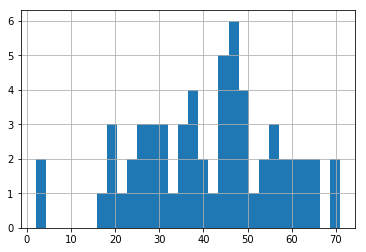

In [305]:
#  8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках.
df = df.dropna()  #  Удаляем NaN
age_surv = df.drop(["PassengerId", "Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis = "columns")  #  Удаление ненужных столбцов
age_surv_0 = age_surv[age_surv.Survived == 0]  #  Таблица возрастов невыживших пассажиров
age_surv_1 = age_surv[age_surv.Survived == 1]  #  Таблица возрастов выживших пассажиров
age_surv_0.Age.hist(bins = 30)  #  Гистограмма возрастов невыживших пассажиров

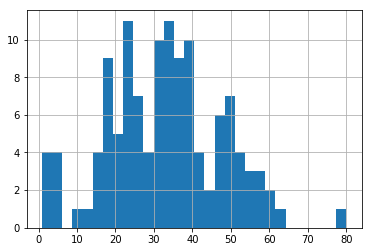

In [306]:
age_surv_1.Age.hist(bins = 30)  #  Гистограмма возрастов выживших пассажиров

C:\Users\Mikhail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


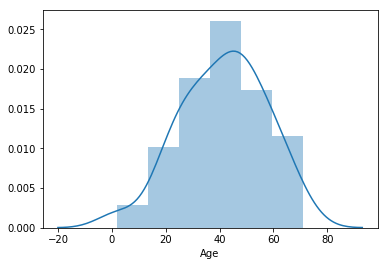

In [316]:
import seaborn
seaborn.distplot(age_surv_0.Age)  #  Гистограмма не выживших пассажиров seaborn

C:\Users\Mikhail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


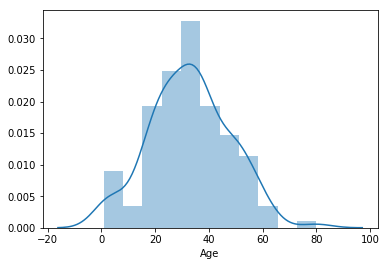

In [317]:
seaborn.distplot(age_surv_1.Age)  #  Гистограмма выживших пассажиров seaborn

In [320]:
#  Вывод:  по гистограмме выживших можно судить, что выживаемость была выше среди людей от 20 до 40 лет. Также видно, что выживаемость среди детей больше (так как люди стремятся спасать детей в первую очередь).
#  Пик гистограммы погибших - люди, возраста около 40. Таким образом пик гистограммы выживших смещен по возрасту влево, относительно пика гистограммы погибших.

C:\Users\Mikhail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


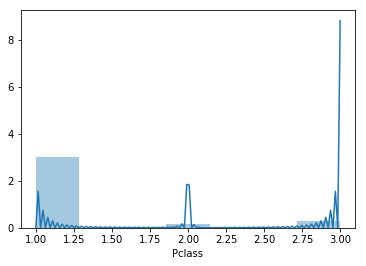

In [327]:
#  9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.
class_surv = df.drop(["PassengerId", "Age", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis = "columns")  #  Удаление ненужных столбцов
class_surv_0 = class_surv[class_surv.Survived == 0]  #  Таблица возрастов невыживших пассажиров
class_surv_1 = class_surv[class_surv.Survived == 1]  #  Таблица возрастов выживших пассажиров
seaborn.distplot(class_surv_0.Pclass)  #  Гистограмма погибших по классам. Как видно из гистограммы, больше всего погибших - пассажиры 3 класса.

C:\Users\Mikhail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


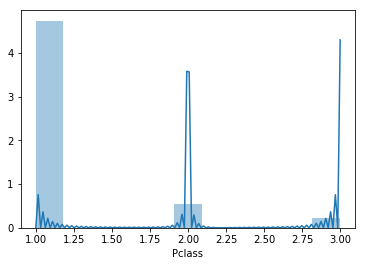

In [328]:
seaborn.distplot(class_surv_1.Pclass)  #  Гистограмма выживших по классам.

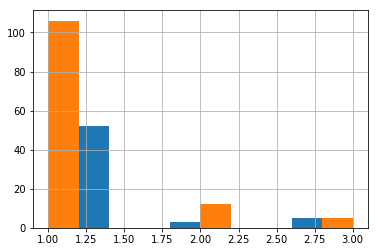

In [347]:
class_surv_0.Pclass.hist(bins = 5)  #  Гистограмма погибших и выживших по классам.
class_surv_1.Pclass.hist(bins = 10)

In [348]:
#  Вывод:  по гистограммам видно, что выживших 1 класса больше, чем выживших 3. Некоторые данные удалены из таблицы по причине отсутствия конкретных значений, поэтому количество людей может отличаться.

Sex
female    88
male      95
Name: PassengerId, dtype: int64

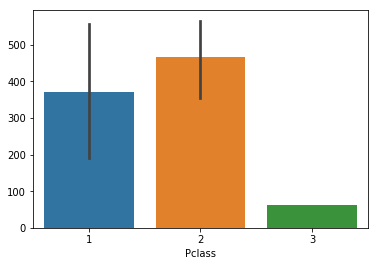

In [462]:
#  10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.
children = df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "Pclass", "Survived", "Sex"], axis = "columns")  #  Удаление ненужных столбцов
seaborn.barplot(x='Sex', y=df.index, data=df)  #  Визуализация количества мужчин, женщин.
seaborn.barplot(x=df[df.Age<=11].Pclass, y=df.index, data=df)  #  Визуализация количества детей
#  1 - количество женщин, 2 - количество мужчин, 3 - количество детей.
#  В качестве подтверждения выведем количество мужчин и женщин в виде текстовой информации
df.groupby(["Sex"])["PassengerId"].count()  #  Значений меньше, чем в исходной таблице, т. к. были удаленые строки, имеющие значения NaN. В целом соотношение соблюдается.